In [1]:
import warnings
warnings.simplefilter("ignore")

# P-Hacking to its finest

We want to try out what is the best way to hack our p-values to create sneaky significant results.

Two new variables will be added to the following brainsize dataset.

The goal is to find some friendly relationships between those new variables (partY and partY2) and the crew of already existing variables.

! Let's have fun now !

## Requirements

1. Numpy
2. Pandas
3. Scipy
4. Statsmodels
5. Seaborn
6. Matplotlib

# 1. Get our dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Read csv file from https://github.com/ValiquetteVanessa/Valiquette-VanessaVV-QLSC612/tree/master/practical

csvfile = ('https://raw.githubusercontent.com/ValiquetteVanessa/Valiquette-VanessaVV-QLSC612/master/Original-data/brainsize.csv')

brainsize = pd.read_csv(csvfile, sep=';', index_col=0)

#  2. Preprocessing

### Missing values

We want to verify if we have any missing values not to run in further errors during analysis.

In [4]:
# See what shape our dataset has
# Should get (40,7) = 40 subjects by 7 variables
brainsize.shape

(40, 7)

In [5]:
# .head() Gives us the first 5 rows of our dataset
# We can immediately see that we are missing values and they are noted with '.'

brainsize.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545


In [6]:
# Replace '.' with NaN
brainsize = brainsize.replace('.', np.nan)

In [7]:
# Display rows with NaN
df1 = brainsize[brainsize.isna().any(axis=1)]
df1

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
2,Male,140,150,124,NaN,72.5,1001121
21,Male,83,83,86,NaN,NaN,892420


In [8]:
# Drop rows with NaN
brainsize = brainsize.dropna()

### Data type

Verify the type of your variables and modify it to the expected type.

In [9]:
# Verify type of variables by column
brainsize.dtypes

# In the current situation Weight and Height are numbers.
# Since they are under the "object" type, we want to modify that to "int" to be able to apply arithmetics.

Gender       object
FSIQ          int64
VIQ           int64
PIQ           int64
Weight       object
Height       object
MRI_Count     int64
dtype: object

In [10]:
# transform column (variable) type to match actual type

brainsize['Weight'] = brainsize['Weight'].astype(int)
brainsize['Height'] = (pd.to_numeric(brainsize['Height'])).astype(int)

### Data distribution

See data distribution for every variables in dataset

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

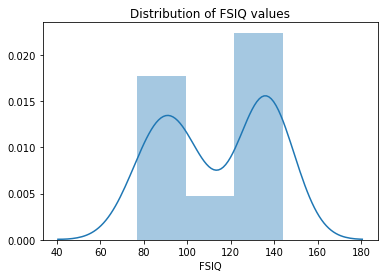

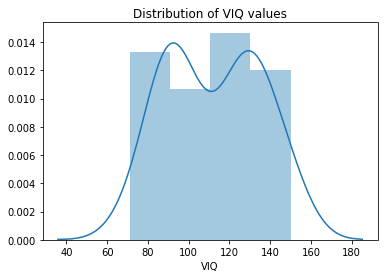

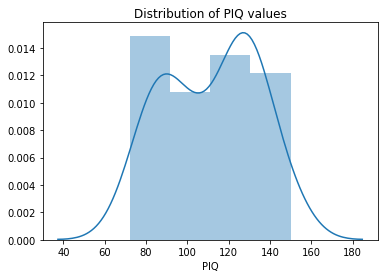

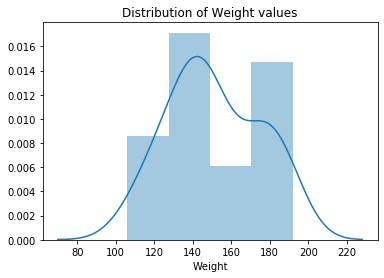

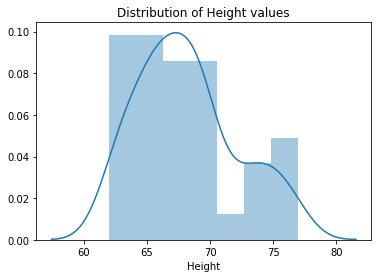

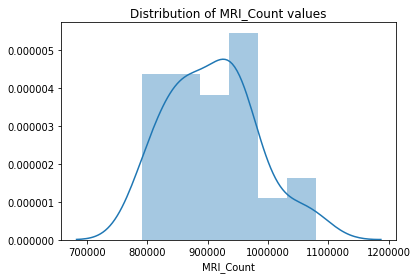

In [12]:
brain = brainsize.iloc[:,1:]
brain
for col in brain:
    sns.distplot(brainsize[col])
    plt.title('Distribution of %s values'%(col))
    plt.show()


All the variables have a bimodal distribution except the MRI_count that is normal.

# 3. Add new variable partY

Create a random normal distribution to fit dataset disrtibutions

In [32]:
# Select a seed to have same random distribution everytime
# Creates a bimodal random distribution added at the end of dataset

np.random.seed(40)
brainsize['partY'] = np.random.randint(3,93,size=len(brainsize.iloc[:,0]))


# 4. Standardize values in dataset

In [14]:
from sklearn.preprocessing import Normalizer

In [15]:
features = brainsize.iloc[:,1:].columns.tolist()
features

['FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count', 'partY']

In [16]:
x = brainsize.loc[:,features].values

In [17]:
x = Normalizer().fit_transform(x)
pd.DataFrame(data=x, columns=features).head(40)

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
0,0.000163,0.000162,0.000152,0.000144,0.000078,1.0,0.000038
1,0.000134,0.000118,0.000144,0.000138,0.000070,1.0,0.000070
2,0.000138,0.000134,0.000133,0.000178,0.000070,1.0,0.000028
3,0.000144,0.000139,0.000141,0.000154,0.000068,1.0,0.000035
4,0.000107,0.000097,0.000118,0.000157,0.000074,1.0,0.000041
5,0.000139,0.000137,0.000132,0.000139,0.000065,1.0,0.000042
6,0.000108,0.000105,0.000115,0.000205,0.000077,1.0,0.000059
7,0.000098,0.000103,0.000093,0.000148,0.000073,1.0,0.000041
8,0.000139,0.000119,0.000154,0.000180,0.000071,1.0,0.000024
9,0.000158,0.000155,0.000149,0.000142,0.000077,1.0,0.000020


# 5. Statistics

Calculate Pearson's correlation between every variable and select only significant ones

In [18]:
from scipy import stats as sst

In [19]:
# Gives the p-values for comparison of new variable partY with 
# every other columns in brainsize (except gender, because categorical)

new = brainsize.iloc[:,1:]

for col in new:
    x= brainsize[col]
    x_name= col

    for col in new:
        
        if col == x_name:
            continue
        y= brainsize[col]
        p_val,coeff = sst.pearsonr(x,y)

        if col == 'partY':
            print(x_name, col, "{:10.4f}".format(p_val))

FSIQ partY     0.0173
VIQ partY     0.0613
PIQ partY     0.0069
Weight partY     0.3827
Height partY     0.3250
MRI_Count partY     0.1648


Functions to plot correlation matrix with only significant results

In [44]:
# Function to plot correlation matrix heatmap

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', cbar_kws={'orientation': 'horizontal'})
    plt.title('Significative correlation between variables')

In [21]:
# Functions that returns a matrix of p-values

def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = sst.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

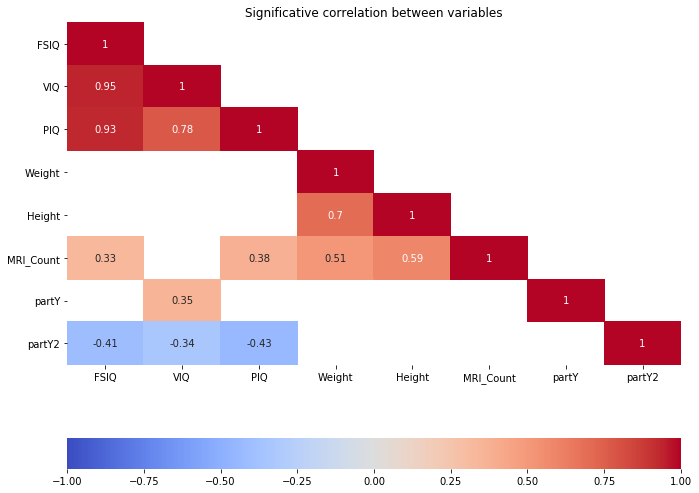

In [45]:
corr = brainsize.iloc[:,1:].corr()          # get correlation
p_values = corr_sig(brainsize.iloc[:,1:])   # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

# 6. Add new variable partY2

Add a second normally distributed variable (partY2) that follows the same function as partY

In [40]:
np.random.seed(1)
brainsize['partY2'] = np.random.randint(3,93,size=len(brainsize.iloc[:,0]))

Run section 5 and 6 to evaluate correlation with new variable partY2

# 7. Conclusion

We can conclude that:

- partY correlates significantly with the Verbal Intelligence Quotient, and so could have a verbal aspect.

- partY2 has a significant inverse correlation with all Intelligence Quotient scores.
